In [1]:
# COVID-19 GLOBAL DATA TRACKER
# Analyze Global trends in Covid-19 cases, deaths and vaccination

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, Markdown
%matplotlib inline

In [3]:
# Load Dataset
df = pd.read_csv('owid-covid-data.csv')
print("Dataset loaded. Shape:", df.shape)
df.head

Dataset loaded. Shape: (429435, 67)


<bound method NDFrame.head of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total

In [4]:
# Data Cleaning
countries = ['Kenya','India','United States']
df = df[df['location'].isin(countries)]
df['date'] = pd.to_datetime(df['date'])
df.fillna(0, inplace=True)

/tmp/ipykernel_1326/1687036460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_1326/1687036460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


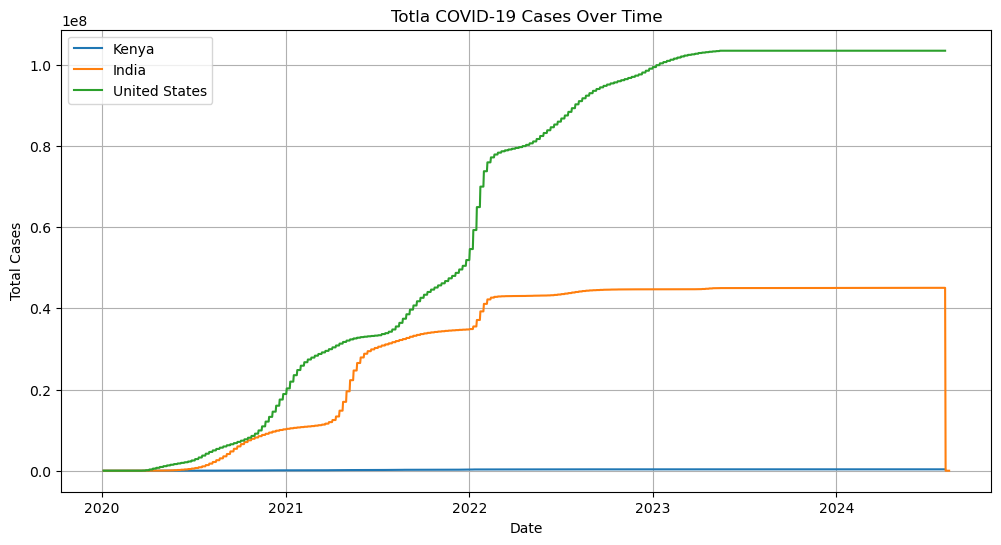

In [5]:
# Total Cases Over Time
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location']== country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Totla COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Death Rate Over Time
df['death_rate'] = df['total_deaths'] / df['total_cases']
plt.figure(figsize=(12,6))
for country in countries:
   plt.plot(df[df['location'] == country]['date'], df[df['location']]) == country]['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1626478758.py, line 5)

In [ ]:
# Vaccination Progress
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Cumulative Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Choropleth Map: Interactive
map_df = pd.read_csv('owid-covid-data.csv')
map_df = map_df[~map_df['iso_code'].str.startswith('OWID')].copy()

METRICS = {
'Total Cases': 'total_cases',
'Total Deaths': 'total_deaths',
'Total Vaccinations': 'total_vaccinations',
'People Vaccinated per Hundred': 'people_vaccinated_per_hundred',
'Deaths per Million': 'total_deaths_per_million',
'Cases per Million': 'total_cases_per_million'
}

metric_dropdown = widgets.Dropdown(
    options=list(metrics.keys()),
    description='Metric:',
    value='Total Cases'
)

available _dates = map_df['date'].unique()
date_dropdown = widgets.Dropdown(
    options=sorted(available_dates, reverse=True),
    description='Date:',
    value=sorted(available_dates, reverse=True)[0]
)

def update_map(metric_label, date_str):
      metric_col = metrics[metric_label]
      filtered = map_df[map_df['date'] == date_str]
      filtered = filtered.drop_duplicates(subset='iso_code')
fig = px.choropleth(
    filtered,
    locations='iso_code',
    color=metric_col,
    hover_name='location',
    color_continuous_scale='Viridis',
    title=f'{metric_label} on {date_str}'
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

widgets.interact(update_map, metric_label=metric_dropdown, date_str=date_dropdown